In [5]:
%load_ext autoreload
%autoreload
import os
from Video import Video
import pandas as pd 
from utils import *
from Highlighter import Highlighter
import cv2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
hl = Highlighter()

construct super frame model
construct single frame model


In [7]:
superlist,vid = hl.predict_video('Fire_Domino')

loading frames ...
loading salient maps ...
get ground truth score ...
split super frames ...
(52, 39913.37420991926)
(119, 52237.49198000769)
(133, 47659.83135717032)
(144, 13265.38334486736)
(155, 5559.2332026143795)
====================  get frame score for Fire_Domino ====================


In [8]:
peaklist = hl.highlight_video(1)

In [9]:
len(peaklist)

14

0.16201426024955437


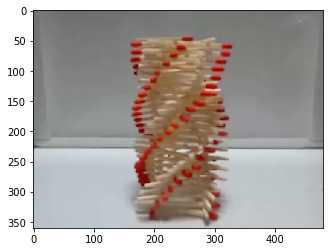

In [10]:
p = peaklist[0]
img = cv2.cvtColor(p['img'], cv2.COLOR_BGR2RGB)
print(p['score'])
plt.imshow(img)

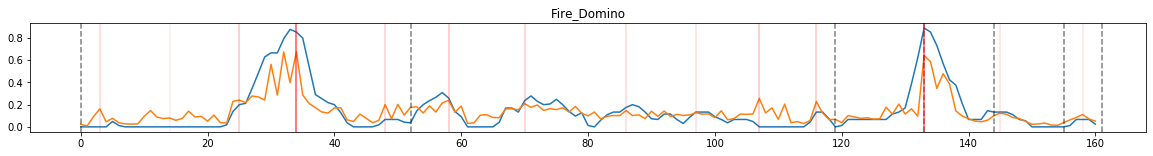

In [11]:
hl.compare_prediction()

In [12]:
[s['score'] for s in superlist]

[0.14932428382754484,
 0.1269052417430055,
 0.07663224628158351,
 0.31194594310796725,
 0.06971545461887764,
 0.05461836307156015]

In [17]:
model_rf = hl.fmodel.model
importances = list(model_rf.feature_importances_)
feature_names = list(hl.fmodel.trainX.columns)
feature_importances = [(feature, round(importance*100, 2)) for feature, importance in zip(feature_names, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

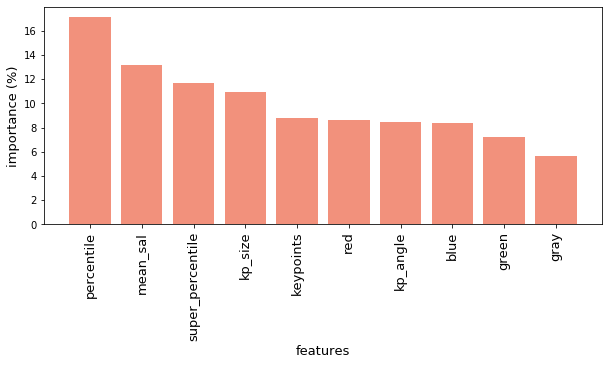

In [20]:
names = [x[0] for x in feature_importances]
values = [x[1] for x in feature_importances]
plt.figure(figsize=(10,4))
plt.bar(names,values,color='#f2917c')
plt.xticks(rotation=90)
plt.xlabel('features',fontsize=13)
plt.ylabel('importance (%)',fontsize=13)
plt.xticks(fontsize=13)

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
x = np.arange(10)

In [14]:
y = np.array([2,3.44,6.32,9.16,11.8,14.76,17.6,21.28,27.52,49.12])

In [15]:
dy = np.array([0,0.506622805,0.627162924,0.746100976,0.816496581,1.128420725,0.866025404,1.514375559,2.902872141,7.412377037])

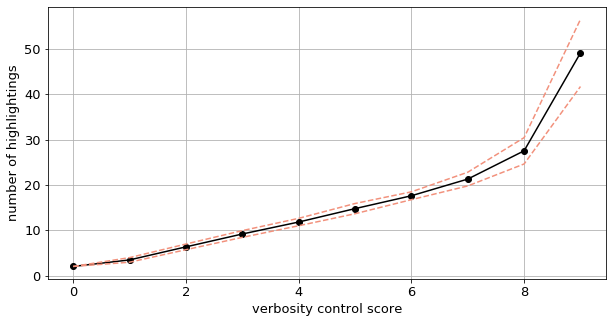

In [55]:
plt.figure(figsize=(10,5))
plt.plot(x, y,'k-o')
plt.plot(x,y-dy,'--',color='#f2917c')
plt.plot(x,y+dy,'--',color='#f2917c')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel("number of highlightings",fontsize=13)
plt.xlabel("verbosity control score",fontsize=13)
plt.grid()